# ベンチマーク結果のプロット

実行環境
- CPU: Intel Core i7-8700
- GPU: NVIDIA GeForce GTX 1660
- RAM: DDR4-2666 16GB x 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json

In [2]:
with open('./benchmark.json', 'r') as f:
    bench_json = json.load(f)

names = [
    {'src': 'MyFixture/Copy', 'dst': 'copy'},
    {'src': 'MyFixture/DaltonLensBrettel1997', 'dst': 'Brettel1997 DaltonLens'},
    {'src': 'MyFixture/DaltonLensVienot1999', 'dst': 'Vienot1999 DaltonLens'},
    {'src': 'MyFixture/DaltonLensOMPBrettel1997', 'dst': 'Brettel1997 OpenMP'},
    {'src': 'MyFixture/DaltonLensOMPVienot1999', 'dst': 'Vienot1999 OpenMP'},
    {'src': 'CLFixture/Brettel1997', 'dst': 'Brettel1997 OpenCL'},
    {'src': 'CLFixture/Vienot1999', 'dst': 'Vienot1999 OpenCL'},
]
def convert_name(name: str):
    for n in names:
        if name.startswith(n['src']):
            return n['dst']

    return 'unknown'

bench_data = pd.DataFrame(list(map(
    lambda x: {
        'name': convert_name(x['name']),
        'size': int(x['name'].split('/')[-1]),
        'real time': x['real_time']
    },
    bench_json['benchmarks']
)))

Text(0, 0.5, 'real time [ns]')

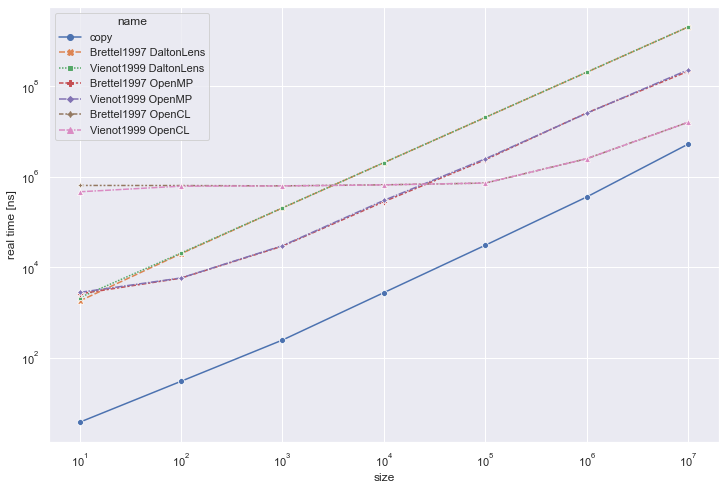

In [3]:
plt.figure(figsize=(12,8))
sns.set()
sns.lineplot(
    data=bench_data,
    x='size', y='real time', hue='name', style='name', markers=True
)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('real time [ns]')

- copy
  - データをコピーするだけ
- Brettel1997 DaltonLens
- Vienot1999 DaltonLens
  - libDaltonLensのコードを流用
- Brettel1997 OpenCL
- Vienot1999 OpenCL
  - libDaltonLensのコードを流用してOpenMPを使用
- Brettel1997 OpenCL
- Vienot1999 OpenCL
  - libDaltonLensのコードを参考にOpenCLを使用


In [4]:
bench_data

,name,size,real time
0,copy,10,3.698931e+00
1,copy,100,2.980669e+01
2,copy,1000,2.436075e+02
3,copy,10000,2.731019e+03
4,copy,100000,3.052239e+04
5,copy,1000000,3.571245e+05
6,copy,10000000,5.277690e+06
7,Brettel1997 DaltonLens,10,1.780384e+03
8,Brettel1997 DaltonLens,100,1.982260e+04
9,Brettel1997 DaltonLens,1000,2.032587e+05
